# Desde los diccionarios y funciones hacia los AUTOMATAS
## Practicando con autómatas simples

**Autómatas y Lenguajes Formales**

**Profesor: Fabio Martínez**

**Escuela de Ingeniería de Sistemas e Informática**   

## Autómata Finito más simple

Los autómatas son modelos teóricos y discretos que permiten problemas computables utilizando una estrategia de codificación y simulación de palabras utilizando: **estados** e **impulsos**

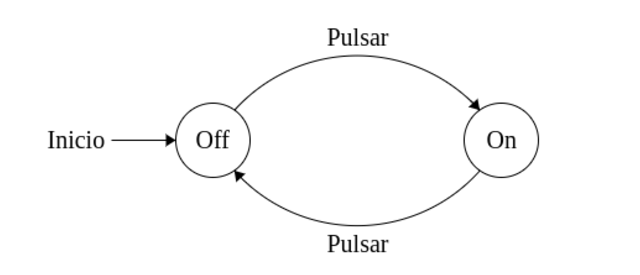

In [3]:
from IPython.display import Image
Image(filename='files/automataSimple.png')

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 1. Autómata simple</div>
</div>

- Los diccionarios son colecciones no-ordenadas que pueden modelar la relación **(estado-impulso)** como la clave y esto conducirá a ***un*** nuevo **estado**: valor accedido desde la clave. 
- Las funciones me permiten agrupar los comandos que conforman la "lógica" del autómata y hacer un llamado **recursivo** al diccionario que contiene la colección de  **(estado-impulso)** que definen el **autómata**

### Implementación

<p>Para la implementación de los autómatas simples mostrados anteriormente, es necesario hacer uso de los conocimientos previos adquiridos en el lenguaje de python.<p>

** La implementación consta de dos elementos fundamentales **  
- Tabla de Transiciones (Mediante diccionario Python)  
- Función de Transición (Utilizando recursividad)  

### Implementación autómata simple

### Tabla de transiciones

In [ ]:
# Si estoy en el estado off y tengo el estimulo "pulsar" entonces debo ir al estado "on"
transiciones={
       ('off','pulsar'):'on',
       ('on','pulsar'):'off',
            }


- ¿Qué tipo de estructura es?. ¿Cómo lo podemos comprobar con Python?
- ¿Cuáles son los componentes de esta estructura?. ¿Cómo lo podemos comprobar con Python?

In [ ]:
type(transiciones)

In [ ]:
for key, val in transiciones.items():
   print "clave: ", key, " valor: ", val

Recuerden que las claves pueden ser de cualquier tipo definido en python, **string, int, tuple, ...**

In [ ]:
print transiciones.get(('off', 'pulsar'))
print type(('off', 'pulsar'))

### Función de transición

In [ ]:
def transicion(pulsaciones,estado_actual,transiciones):# se define la función
    if pulsaciones == []: # Cuando no encuentra nada
        return estado_actual
    else:
        pulsacion = pulsaciones[0] # Comienza con la primera pulsación
        if (estado_actual,pulsacion) in transiciones:# Busca (estado_actual,pulsacion) en la tabla para retornar el estado final
            estado_destino = transiciones[(estado_actual,pulsacion)]
            pulsaciones_restantes = pulsaciones[1:] # Recorre las demás pulsaciones
            return transicion(pulsaciones_restantes,estado_destino,transiciones) # Recursividad
        else:
            return False # Si no es una pulsación válida retorna False
            

In [ ]:
pulsaciones = ["pulsar","pulsar","pulsar"] # Definimos el número de pulsaciones
estado_actual = "on" # Definir el estado de inicio

print("El estado final es: ",transicion(pulsaciones,estado_actual,transiciones))

- "pulsar" ¿es una letra o una palabra?
- ¿Cuáles son los estados?
- ¿El autómata acepta palabras diferente a "pulsar"?

## Reconocimiento de palabras mediante autómatas

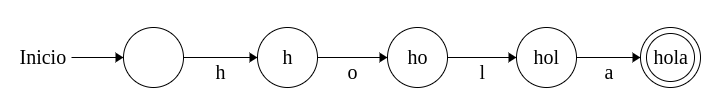

In [5]:
from IPython.display import Image
Image(filename='files/hola.png')

<div style="text-align:center; font-style: italic;" class="image">
<div>Figura 2. Reconocimiento de palabras</div>
</div>

- ¿Cómo se definiría el lenguaje $L$ de este autómata? 
- ¿Qué es $\Sigma$ ?
- ¿Qué es $\Sigma^{*}$ ?

### Implementación de un autómata para reconocer palabras

In [ ]:
transicion={
       (' ','h'):'h',
       ('h','o'):'ho',
       ('ho','l'):'hol',
       ('hol','a'):'hola'
            }

estado_aceptacion=['hola'] # estado de aceptacion

def fun_transicion(cadena,estado_actual,transicion,estado_aceptacion): # se define la función
    if cadena == "": # cuando no encuentra nada
        return estado_actual in estado_aceptacion # si la cadena es ∅, entonces la función retorna True
    else:
        letra = cadena[0] # comienza con el primer caracter
        if(estado_actual,letra)in transicion:  # compara (estado_actual,letra) se encuentra en la tabla de transiciones
            estado_destino = transicion[(estado_actual,letra)]  # si es así, el estado destino tendra el nuevo valor estado
            cadena_restante = cadena[1:] # recorre los demás caracteres
            return fun_transicion(cadena_restante,estado_destino,transicion,estado_aceptacion) # recursividad
        else:
            return False # si la cadena no es aceptada por el autómata, retorna False


In [ ]:
palabra = raw_input("ingresa la palabra a identificar") #input("ingresa la palabra a identificar")
print '\n'
print "esto es: ", palabra
print("La palabra ingresada es hola?: ",fun_transicion(palabra,' ',transicion,estado_aceptacion))

Note que este autómata tiene una definición de **estado de aceptación**. 
    - ¿Qué pasa si quiero cambiar el nombre de los estados?
    - ¿Qué cambio en el código?